# Biostat 257 Homework 1

#### Due Apr 16 @ 11:59PM

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2021-spring` and add `Hua-Zhou` and `Chris-German` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

In [1]:
x = 0.1
y = 0.1
z = 1.0
(x + y) + z == x + (y + z)

false

Since the numbers are floating-point numbers, associativity will not hold. The inaccuracy between adding `x + y` first as opposed to `y + z` is different, and rounding will go to the nearest representable floating point number, which could lead to differences when adding the same values in different orders. 

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

In [2]:
(x * y) * z == x * (y * z)

true

In [3]:
a = 0.1
b = 10
c = 257257257257257257
(a * b) * c == a * (b * c)

false

The same issue with rounding in addition also occurs in multiplication. Since `0.1` is not representable fully accurately as a floating point number, eventually multiplication will lead to rounding errors in the intermediate terms when different orders of which numbers to multiply first are used (associative property).

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

In [4]:
100 * (0.1 + 1.0) == 100 * 0.1 + 100 * 1.0

false

Rounding errors when adding as opposed to multiplying first will result in a violation of distributive property.

4. Is `0 * x == 0` true for all floating-point number `x`? 

In [5]:
Inf * 0

NaN

In [6]:
NaN * 0

NaN

For all finite floating point numbers, multiplication by 0 will end in 0. However, for values greater than all finite floating-point values, or for a value not equivalent to any floating-point value (not a number), this will not hold.

5. Is `x / a == x * (1 / a)` always true?

In [7]:
a = 257257257257257257
b = 0.1
a/b == a * (1 / b)

false

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

In [8]:
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
@code_llvm g(257)
@code_llvm g(257.0)

;  @ In[8]:1 within `g'
; Function Attrs: uwtable
define i64 @julia_g_1241(i64 signext %0) #0 {
top:
;  @ In[8]:3 within `g'
; ┌ @ int.jl:88 within `*'
   %1 = mul i64 %0, 9765625
; └
; ┌ @ int.jl:86 within `-'
   %2 = add i64 %1, -2441406
; └
;  @ In[8]:5 within `g'
  ret i64 %2
}
;  @ In[8]:1 within `g'
; Function Attrs: uwtable
define double @julia_g_1269(double %0) #0 {
top:
;  @ In[8]:3 within `g'
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %1 = fmul double %0, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %2 = fadd double %1, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %3 = fmul double %2, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %4 = fadd double %3, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
   %5 = fmul double %4, 5.000000e+00
; └
; ┌ @ promotion.jl:323 within `-' @ float.jl:329
   %6 = fadd double %5, -1.000000e+00
; └
; ┌ @ promotion.jl:322 within `*' @ float.jl:332
  

For `Int64` input, the compiler immediately multiplies by $5^{10}$ and subtracts $5^9 + 5^8 + \cdots + 5^0$ (by adding its negative). Meanwhile, for the `Float64` input, the compiler multiplies by $5$ and subtracts $1$, then iterates this $10$ times. 

In [9]:
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
@code_llvm g_fastmath(257)
@code_llvm g_fastmath(257.0)

;  @ In[9]:1 within `g_fastmath'
; Function Attrs: uwtable
define i64 @julia_g_fastmath_1277(i64 signext %0) #0 {
top:
;  @ In[9]:3 within `g_fastmath'
; ┌ @ fastmath.jl:270 within `mul_fast'
; │┌ @ int.jl:88 within `*'
    %1 = mul i64 %0, 9765625
; └└
; ┌ @ fastmath.jl:270 within `sub_fast'
; │┌ @ int.jl:86 within `-'
    %2 = add i64 %1, -2441406
; └└
;  @ In[9]:5 within `g_fastmath'
  ret i64 %2
}
;  @ In[9]:1 within `g_fastmath'
; Function Attrs: uwtable
define double @julia_g_fastmath_1279(double %0) #0 {
top:
;  @ In[9]:3 within `g_fastmath'
; ┌ @ fastmath.jl:267 within `mul_fast' @ fastmath.jl:167
   %1 = fmul fast double %0, 0x4162A05F20000000
; └
; ┌ @ fastmath.jl:267 within `sub_fast' @ fastmath.jl:166
   %2 = fadd fast double %1, 0xC142A05F00000000
; └
;  @ In[9]:5 within `g_fastmath'
  ret double %2
}


`@fastmath` executes a faster transformation of the expression. This sacrifices precision for speed. Both types of inputs in this case now do the same thing, where the compiler conducts one multiplication and one subtraction for each. For `Float64` input, the terms for these operations are in double precision hexadecimal format.

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

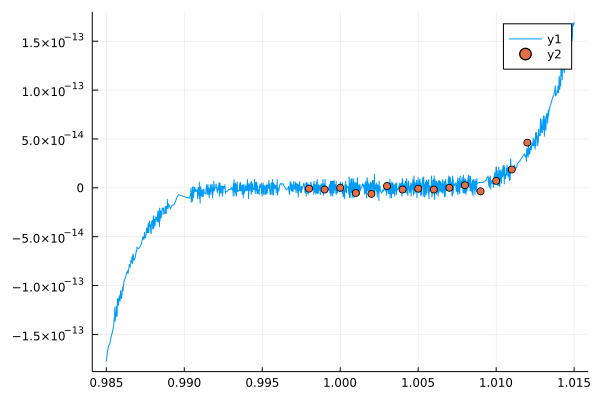

In [10]:
using Plots
x = collect(998:1012)/1000
f(x) = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1
y = f.(x)
Plots.plot(f, 0.985, 1.015)
scatter!(x, y)

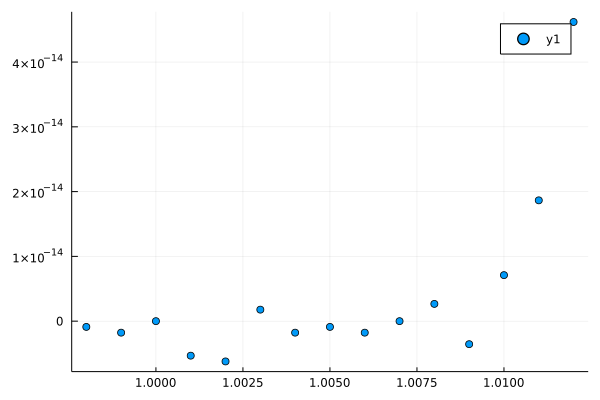

In [11]:
scatter(x, y)

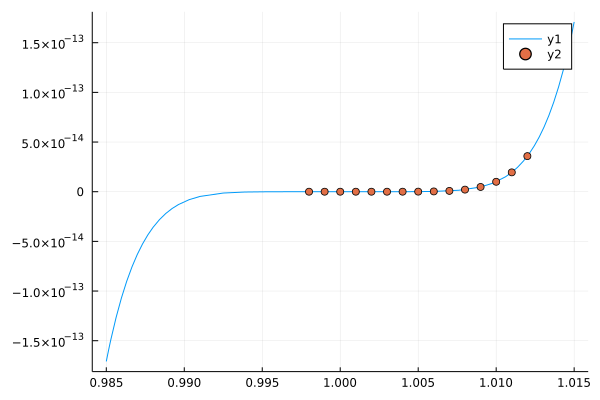

In [12]:
f(x) = (x - 1)^7
y = f.(x)
Plots.plot(f, 0.985, 1.015)
scatter!(x,y)

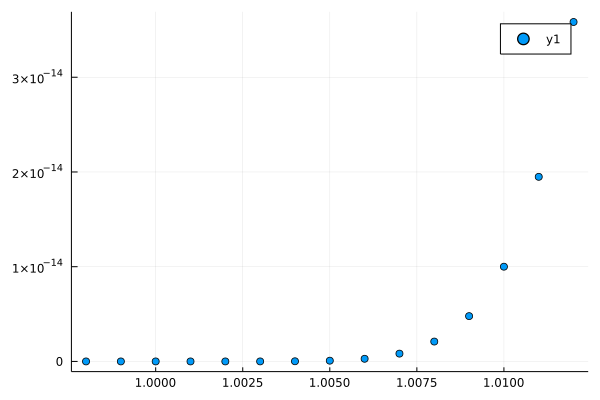

In [13]:
scatter(x, y)

The expanded polynomial in 1 was not as smooth as the one in 2. This could be due to the fact that multiple operations in the first version lead to higher occurences of rounding error, as opposed to that of the second.

# Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

First, suppose we have the system for $\mathbf{x}$:
    $$
    (A + \mathbf{uu}^T)\mathbf{x} = y \\
    A\mathbf{x} = \mathbf{y} - \mathbf{uu}^T\mathbf{x} \\
    \mathbf{x} = A^{-1}\mathbf{y} - A^{-1}\mathbf{uu}^T\mathbf{x}
    $$
$\mathbf{u}^T\mathbf{x}$ will be a constant $c$.
    $$
    \mathbf{x} = A^{-1}\mathbf{y} - A^{-1}\mathbf{u}c \\
    c = \mathbf{u}^T\mathbf{x} = \mathbf{u}^TA^{-1}\mathbf{y} - \mathbf{u}^TA^{-1}\mathbf{u}c \\
    (1 + \mathbf{u}^TA^{-1}\mathbf{u})c = \mathbf{u}^TA^{-1}\mathbf{y} \\
    c = \frac{\mathbf{u}^TA^{-1}\mathbf{y}}{1 + \mathbf{u}^TA^{-1}\mathbf{u}}
    \mathbf{x} = A^{-1}\mathbf{y} - A^{-1}\mathbf{u}(\frac{\mathbf{u}^TA^{-1}\mathbf{y}}{1 + \mathbf{u}^TA^{-1}\mathbf{u}}) \\ 
    \mathbf{x} = (A^{-1} - \frac{A^{-1}\mathbf{u}\mathbf{u}^TA^{-1}\mathbf{y}}{1 + \mathbf{u}^TA^{-1}\mathbf{u}})\mathbf{y}
    $$
From the original equation, we now have
    $$
    (A+\mathbf{uv}^T)^{-1} = A^{-1} - \frac{A^{-1}\mathbf{u}\mathbf{u}^TA^{-1}\mathbf{y}}{1 + \mathbf{u}^TA^{-1}\mathbf{u}} 
    $$

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

$$
(A + UV^T)^{-1} = A^{-1} - A^{-1}U(I_m + V^TA^{-1}U)^{-1}V^TA^{-1} \\
(A + UV^T)(A + UV^T)^{-1} = (A + UV^T)(A^{-1} - A^{-1}U(I_m + V^TA^{-1}U)^{-1}V^TA^{-1}) \\
= (I - U(I_m + V^TA^{-1}U)^{-1}VA^{-1}) + (UV^TA^{-1} - UV^T(U(I_m + V^TA^{-1}U)^{-1}V^TA^{-1} \\
= (I + UV^TA^{-1} - (U + UV^TA^{-1}U)(I_m + V^TA^{-1}U)^{-1}V^TA^{-1} \\
= I + UV^TA^{-1} - U(I_m + V^TA^{-1}U)(I_m + VA^{-1}U)^{-1}V^TA^{-1} \\
= I + UV^TA^{-1} - UV^TA^{-1} \\
= I
$$
So the inverse holds.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

$$
(A + UBV^T)^{-1} = A^{-1} - A^{-1}U(B^{-1} + V^TA^{-1}U)^{-1}V^TA^{-1} \\
(A + UV^T)(A + UV^T)^{-1} = (A + UV^T)(A^{-1} - A^{-1}U(B^{-1} + V^TA^{-1}U)^{-1}V^TA^{-1}) \\
= (I - U(B^{-1} + V^TA^{-1}U)^{-1}VA^{-1}) + (UBV^TA^{-1} - UBV^T(U(B^{-1} + V^TA^{-1}U)^{-1}V^TA^{-1} \\
= (I + UBV^TA^{-1} - (U + UBV^TA^{-1}U)(B^{-1} + V^TA^{-1}U)^{-1}V^TA^{-1} \\
= I + UBV^TA^{-1} - UB(B^{-1} + V^TA^{-1}U)(B^{-1} + VA^{-1}U)^{-1}V^TA^{-1} \\
= I + UBV^TA^{-1} - UBV^TA^{-1} \\
= I
$$
So the inverse holds.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

$$
det(A + UV^T) = det(A(I + A^{-1}UV^T)) \\
= det(A)det(I + A^{-1}UV^T)
$$

## Q6

Demonstrate the following facts about triangular matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

In [14]:
Upper1 = randn(5,5)
for j in 1:size(Upper1, 1), i in j+1:size(Upper1, 1)
    Upper1[i, j] = 0
end
Upper1

5×5 Matrix{Float64}:
 -0.00170095  -0.792156  -1.34607    0.426557   0.33463
  0.0         -2.40777    0.450304  -0.578476   0.564087
  0.0          0.0        1.31747   -0.198982  -0.337843
  0.0          0.0        0.0        0.580607   0.520169
  0.0          0.0        0.0        0.0        0.798326

In [15]:
Upper2 = randn(5,5)
for j in 1:size(Upper2, 1), i in j+1:size(Upper2, 1)
    Upper2[i, j] = 0
end
Upper2

5×5 Matrix{Float64}:
 2.1486  0.499321   1.05676    0.833352   0.468165
 0.0     1.28309   -0.251003  -1.71345   -0.0583536
 0.0     0.0       -0.381976  -0.442224  -0.886452
 0.0     0.0        0.0        1.70468   -1.18671
 0.0     0.0        0.0        0.0        1.61627

In [16]:
Upper1 * Upper2

5×5 Matrix{Float64}:
 -0.00365464  -1.01726   0.711203   2.67831    1.27331
  0.0         -3.08938   0.432352   2.94034    1.33953
  0.0          0.0      -0.503243  -0.921819  -1.47779
  0.0          0.0       0.0        0.989752   0.151719
  0.0          0.0       0.0        0.0        1.29031

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

In [17]:
inv(Upper1)

5×5 Matrix{Float64}:
 -587.908  193.422     -666.78      396.118     -430.515
    0.0     -0.415323     0.141954   -0.365148     0.591457
    0.0      0.0          0.759028    0.260129     0.151719
    0.0      0.0          0.0         1.72233     -1.12223
    0.0      0.0          0.0         0.0          1.25262

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

In [23]:
UnitUpper1 = Upper1
for j in 1:size(UnitUpper1, 1)
    UnitUpper1[j, j] = 1
end
UnitUpper1

5×5 Matrix{Float64}:
 1.0  -0.792156  -1.34607    0.426557   0.33463
 0.0   1.0        0.450304  -0.578476   0.564087
 0.0   0.0        1.0       -0.198982  -0.337843
 0.0   0.0        0.0        1.0        0.520169
 0.0   0.0        0.0        0.0        1.0

In [24]:
UnitUpper2 = Upper2
for j in 1:size(UnitUpper2, 1)
    UnitUpper2[j, j] = 1
end
UnitUpper2

5×5 Matrix{Float64}:
 1.0  0.499321   1.05676    0.833352   0.468165
 0.0  1.0       -0.251003  -1.71345   -0.0583536
 0.0  0.0        1.0       -0.442224  -0.886452
 0.0  0.0        0.0        1.0       -1.18671
 0.0  0.0        0.0        0.0        1.0

In [22]:
UnitUpper1 * UnitUpper2

5×5 Matrix{Float64}:
 1.0  -0.292835  -0.0904821   3.2125     1.53605
 0.0   1.0        0.1993     -2.49106    0.793044
 0.0   0.0        1.0        -0.641205  -0.988161
 0.0   0.0        0.0         1.0       -0.666542
 0.0   0.0        0.0         0.0        1.0

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

In [25]:
inv(UnitUpper1)

5×5 Matrix{Float64}:
 1.0  0.792156   0.989362  0.228551  -0.566111
 0.0  1.0       -0.450304  0.488873  -0.970516
 0.0  0.0        1.0       0.198982   0.234339
 0.0  0.0        0.0       1.0       -0.520169
 0.0  0.0        0.0       0.0        1.0

5. An orthogonal upper (lower) triangular matrix is diagonal.
If $M$ is an invertible upper triangular matrix, $M^{-1}$ is also upper triangular, and $M^T$ is lower triangular. However, for orthogonal matrices, $M^T = M^{-1}$. An upper triangular may only be equivalent to a lower triangular matrix if their diagonals are equivalent, and all other entries are $0$.

In [34]:
orth = zeros(4, 4)
for j in 3:size(orth, 1)
    orth[j, j] = -1
end
for j in 1:2
    orth[j, j] = 1
end
orth

4×4 Matrix{Float64}:
 1.0  0.0   0.0   0.0
 0.0  1.0   0.0   0.0
 0.0  0.0  -1.0   0.0
 0.0  0.0   0.0  -1.0

In [35]:
orth * transpose(orth)

4×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0